In [1]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings

In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path (adjust to your folder location)
file_path = "/content/drive/My Drive/Application process notes (1).xlsx"

# Read the Excel file
culinarydf = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
culinarydf.head(7)

,Cohort number,Application window start,Application window end,Cohort Start Date,Applications Submitted,Notes,Unique applicants,# applicants who Attended Info Session,# applicants who Completed Application Packet,Recruitment notes,# applicants who Passed Math & Reading,Notes,# applicants who Failed Math & Reading,Eligible applicants,Eligibility Notes,Avg. Priority Score (enrolled student),Notes.1,Goal # spots to fill,Enrollment offers extended,Enrollment offers notes,Total screened (drug test),Negative (*positive with medical documentation accepted),Positive,Pass rate Drug Screening,Drug screening notes,Recruited (attended at least 1 day),Enrolled - Week 2,Notes.2,Graduated,Notes.3
0,1,2021-08-02 00:00:00,2021-09-17 00:00:00,2021-10-04 00:00:00,95,GWK restaurant launch was in the media,88.0,44,37.0,Full-time SSC,18.0,"PR reading, recipe scaling",26.0,37.0,Did not require passing math & reading assessment,21.10,passing Math & reading added 5 points to prior...,20,31.0,NaN,22.0,20.0,2.0,0.909091,1 student with medical marijuana card,20,17.0,3 students enrolled after Day 1: all dropped o...,14.0,Did not dismiss students who accumulated too m...
1,2,2021-11-01 00:00:00,2021-12-23 00:00:00,2022-01-04 00:00:00,139,GWK restaurant launch was in the media,127.0,39,35.0,"No SSC, Facebook ad, special enrollment window...",23.0,"new assessment - food safety, simple equations",16.0,22.0,required >74% score on both math and reading a...,21.50,passing Math & reading did not contribute to p...,10,26.0,Eligible applicants + 1 offer made to person f...,13.0,9.0,4.0,0.692308,4 students tested positive for marijuana witho...,10,10.0,1 student enrolled after Day 1,9.0,Did not dismiss students who accumulated too m...
2,3,2021-12-24 00:00:00,2022-03-24 00:00:00,2022-04-12 00:00:00,55,NaN,56.0,16,11.0,"Full-time SSC, no facebook ads, SSC conducted ...",14.0,posted videos and sample math questions on the...,1.0,9.0,required proof of covid vaccination,24.00,in-person interview with SSC added ; interview...,10,12.0,NaN,NaN,NaN,NaN,NaN,NaN,10,10.0,NaN,10.0,NaN
3,4,2022-03-25 00:00:00,2022-06-17 00:00:00,2022-07-12 00:00:00,37,NaN,39.0,24,20.0,offered in-person and virtual information sess...,19.0,offered virtual info session option so some in...,5.0,16.0,required proof of covid vaccination,25.90,NaN,10,12.0,NaN,0.0,NaN,NaN,NaN,eliminated drug screening requirement,11,10.0,enrolled students after Day 1,8.0,NaN
4,5,2022-06-18 00:00:00,2022-09-16 00:00:00,2022-10-11 00:00:00,55,NaN,56.0,19,16.0,offered info sessions mostly as 3-hour blocks ...,16.0,NaN,3.0,15.0,required proof of covid vaccination,28.20,NaN,10,17.0,NaN,0.0,NaN,NaN,NaN,eliminated drug screening requirement,14,14.0,NaN,10.0,allowed a student to make up hours in restaura...
5,6,2022-09-17 00:00:00,2022-12-16 00:00:00,2023-01-10 00:00:00,41,NaN,40.0,16,13.0,NaN,15.0,allowed same day grading and retakes of readin...,1.0,13.0,required proof of covid vaccination,20.40,NaN,10,16.0,2 applicants offered enrollment went on waitin...,NaN,NaN,NaN,NaN,NaN,11,11.0,NaN,8.0,NaN
6,7,2022-12-17 00:00:00,"Monday March 20, 2023",2023-04-11 00:00:00,83,GWK restaurant re-launch was in the media,83.0,30,26.0,NaN,23.0,allowed same day grading and retakes of readin...,7.0,23.0,required proof of covid vaccination,20.36,NaN,15,18.0,NaN,NaN,NaN,NaN,NaN,NaN,15,15.0,NaN,12.0,NaN


In [7]:
culinarydf.shape


(18, 30)

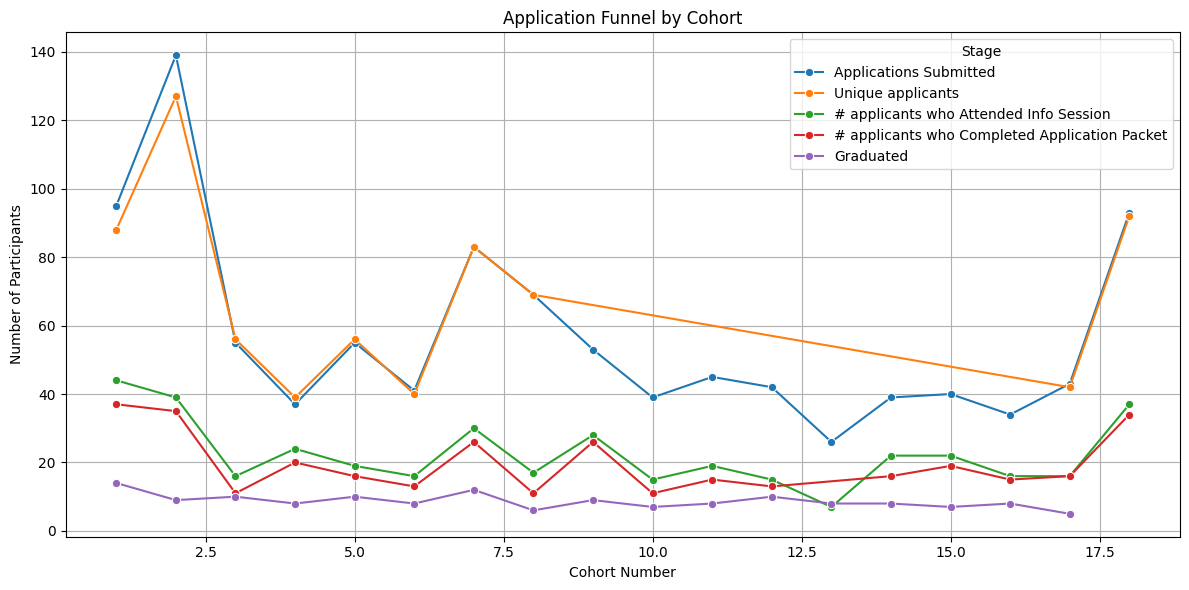

{'Correlation: Info Session vs Completion': np.float64(0.9812758395595421), 'Graduation Mean (No Recruitment Notes)': np.float64(7.714285714285714), 'Graduation Mean (With Recruitment Notes)': np.float64(9.3)}


In [9]:
# Load and clean the data
culinarydf.columns = culinarydf.columns.str.strip()

# 1. Exploratory Analysis: Visualize application funnel trends
def plot_application_funnel():
    pipeline_cols = [
        'Applications Submitted',
        'Unique applicants',
        '# applicants who Attended Info Session',
        '# applicants who Completed Application Packet',
        'Graduated'
    ]
    df = culinarydf[['Cohort number'] + pipeline_cols].copy()
    df = df.apply(pd.to_numeric, errors='coerce')
    melted = df.melt(id_vars='Cohort number', var_name='Stage', value_name='Count')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted, x='Cohort number', y='Count', hue='Stage', marker='o')
    plt.title('Application Funnel by Cohort')
    plt.xlabel('Cohort Number')
    plt.ylabel('Number of Participants')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 2. Bivariate Analysis: Info Sessions vs Completion + Recruitment Notes vs Graduation
def bivariate_analysis(df):
    results = {}

    # Info Session Attendance vs. Application Packet Completion
    info_data = df[
        ['# applicants who Attended Info Session', '# applicants who Completed Application Packet']
    ].dropna()
    results['Correlation: Info Session vs Completion'] = info_data.corr().iloc[0, 1]

    # Recruitment Notes vs. Graduation
    df['Has Recruitment Notes'] = df['Recruitment notes'].notna().astype(int)
    grad_data = df[['Has Recruitment Notes', 'Graduated']].dropna()
    grad_means = grad_data.groupby('Has Recruitment Notes')['Graduated'].mean()
    results['Graduation Mean (No Recruitment Notes)'] = grad_means.get(0, np.nan)
    results['Graduation Mean (With Recruitment Notes)'] = grad_means.get(1, np.nan)

    return results

# Run the full analysis
plot_application_funnel()
summary_results = bivariate_analysis(culinarydf)
print(summary_results)
